In [1]:
#load the dataset
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")  # Replace with your actual file path


Explore the Data

In [7]:
# Check the first few rows of the dataset
df.head()

# Check for missing values
df.isnull().sum()

# Check class distribution
df['sentiment'].value_counts()


,count
sentiment,
positive,25000
negative,25000


Text Preprocessing

In [8]:
# Function to clean text
import string

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()  # Split text into words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply the cleaning function to the review column
df['cleaned_review'] = df['review'].apply(clean_text)

# Check the cleaned text
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


Split the Data

In [9]:
X = df['cleaned_review']  # Features (reviews)
y = df['sentiment']  # Target variable (positive/negative)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text Vectorization

In [10]:
# Convert text data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Build the Sentiment Analysis Model

In [11]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)



MultinomialNB()

Evaluate the Model

Accuracy: 0.8528

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



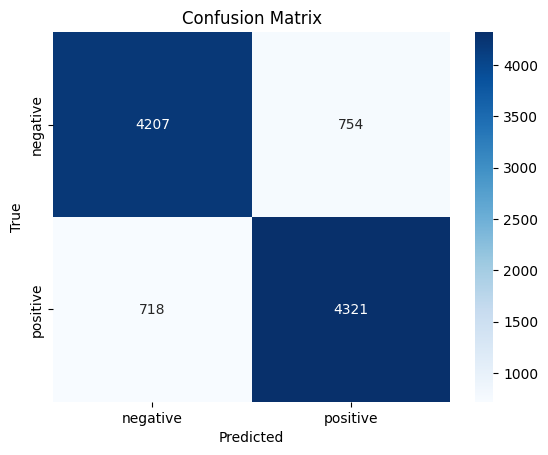

In [12]:
# Predict the sentiment for the test set
y_pred = model.predict(X_test_tfidf)

# Check accuracy and print classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to see how well the model is performing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Predicting Sentiment for New Reviews

In [13]:
# Example review
new_review = "I loved this movie! It was amazing and the acting was great."

# Clean and vectorize the new review
new_review_cleaned = clean_text(new_review)
new_review_tfidf = vectorizer.transform([new_review_cleaned])

# Predict the sentiment
predicted_sentiment = model.predict(new_review_tfidf)
print(f"Predicted Sentiment: {predicted_sentiment[0]}")


Predicted Sentiment: positive
